In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


## loading cell from ASC file format

In [2]:

dir_path = os.path.abspath('')
morph_path=os.path.join(dir_path,'data/morph.ASC')

analyser = Analyzer(type='ASC', morph_path=morph_path)


open_morph:  /ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool/data/morph.ASC

17089 lines read

/ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool/data/morph.ASC problems


Main branch starting at line 305 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma

Main branch starting at line 3635 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


## plot the cell morphology

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 29507.35it/s]


<AxesSubplot:>

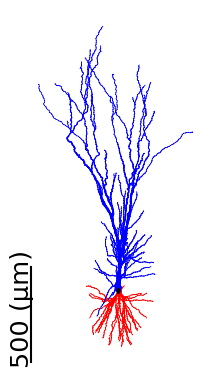

In [3]:
analyser.plot_morph(scale=500, diam_factor=0.5, theta=-75)

## create a somaticentric view card 

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 27500.26it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / λ)', ylabel='V(x)/V(0)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / λ)'>],
       dtype=object))

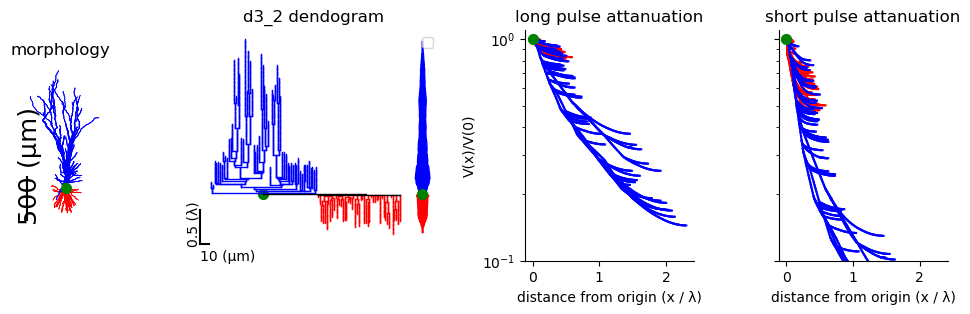

In [4]:
analyser.create_card(theta=-75, diam_factor=0.5)

## create a spasific segment centric view card

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 29635.56it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / λ)', ylabel='V(x)/V(0)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / λ)'>],
       dtype=object))

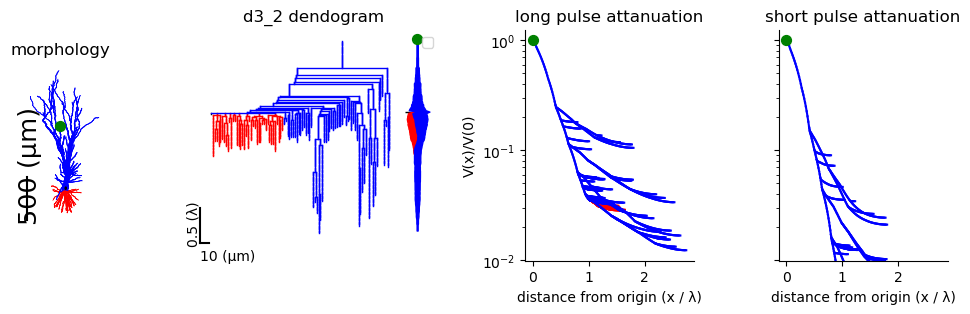

In [5]:
analyser.create_card(start_seg=list(analyser.cell.apic[101])[-1], theta=-75, diam_factor=0.5)

## defining a seg value function and flot the result on the cell morphology

#### here we show that the first bifurcation in the apical tree impose a frequncy gating for signal passing to the relative hot spot
#### we start by difining a function that gives the transfer impadance between 2 segments and then calculating it for all the segments with respect to the hot spot (1/2/3), the hot spot position is marked by a red circle

In [3]:
hot_spots = [list(analyser.cell.apic[43])[-1], list(analyser.cell.apic[64])[-1], list(analyser.cell.apic[77])[-1]]

freqs = np.concatenate([np.arange(0, 1, 0.05), np.arange(1, 10, 0.1), np.arange(10, 1000,1)])
def transfer_freq(seg1, seg2, freqs = freqs):
    imp = h.Impedance(seg1.x, sec=seg1.sec)
    imp.loc(seg1.x, sec=seg1.sec)
    transfer = []
    for freq in freqs:
        imp.compute(freq)
        transfer.append(imp.transfer(seg2.x, sec=seg2.sec))
    return freqs, np.array(transfer)


apical: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1805/1805 [05:11<00:00,  5.80it/s]
axon: 0it [00:00, ?it/s]
else: 0it [00:00, ?it/s]
optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 28857.06it/s]


Text(0, 0.5, 'f_half (Hz)')

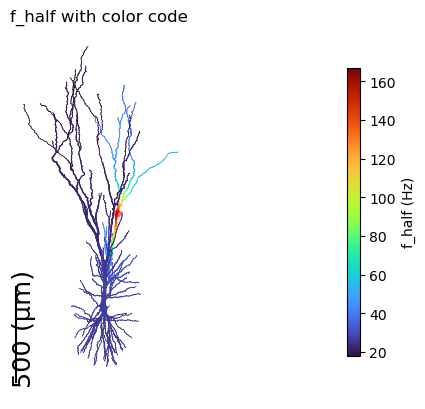

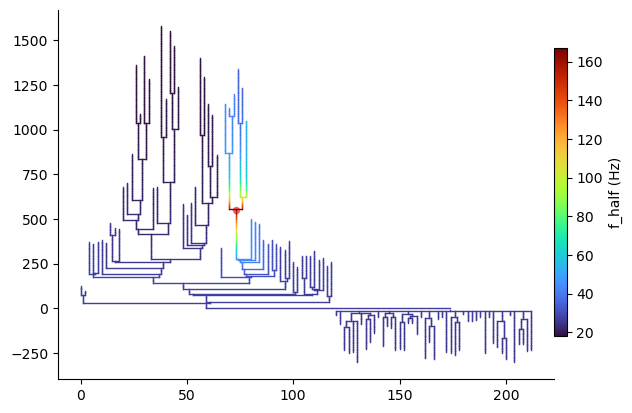

In [10]:

def f_half(seg):
    f, R_tr = transfer_freq(seg, hot_spots[0])
    f_half = f[R_tr<(R_tr.max()-R_tr.min())/2][0]
    return f_half

seg_to_indicate_dict={hot_spots[0]:dict(color='r', alpha=0.5, size=20)}
plt.title('f_half with color code')
ax, color_bar, colors=analyser.plot_morph_with_value_func(func = f_half, run_time=1000, theta=-75, scale=500, 
                                                          diam_factor=0.5, seg_to_indicate_dict=seg_to_indicate_dict)#, colors=colors)
color_bar.set_ylabel('f_half (Hz)')

plt.figure()
ax, x_pos, cax, colors = analyser.plot_dendogram_with_value_func(func = None, diam_factor=None, colors=colors, 
                                                                 segs_to_indecate=seg_to_indicate_dict)
cax.set_ylabel('f_half (Hz)')


apical: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1805/1805 [05:10<00:00,  5.82it/s]
axon: 0it [00:00, ?it/s]
else: 0it [00:00, ?it/s]
optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 28241.93it/s]


Text(0, 0.5, 'f_half (Hz)')

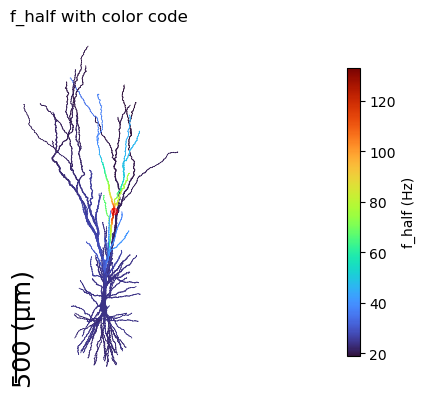

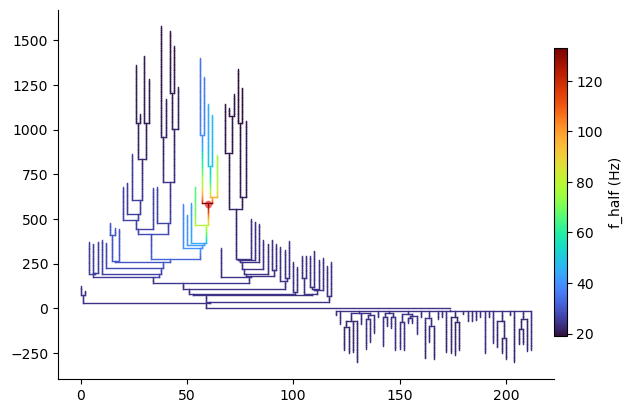

In [11]:
def f_half(seg):
    f, R_tr = transfer_freq(seg, hot_spots[1])
    f_half = f[R_tr<(R_tr.max()-R_tr.min())/2][0]
    return f_half

seg_to_indicate_dict={hot_spots[1]:dict(color='r', alpha=0.5, size=20)}
plt.title('f_half with color code')
ax, color_bar, colors=analyser.plot_morph_with_value_func(func = f_half, run_time=1000, theta=-75, scale=500, 
                                                          diam_factor=0.5, seg_to_indicate_dict=seg_to_indicate_dict)
color_bar.set_ylabel('f_half (Hz)')

plt.figure()
ax, x_pos, cax, colors = analyser.plot_dendogram_with_value_func(func = None, diam_factor=None, colors=colors, 
                                                                 segs_to_indecate=seg_to_indicate_dict)
cax.set_ylabel('f_half (Hz)')


apical: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1805/1805 [04:57<00:00,  6.06it/s]
axon: 0it [00:00, ?it/s]
else: 0it [00:00, ?it/s]
optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 29855.54it/s]


Text(0, 0.5, 'f_half (Hz)')

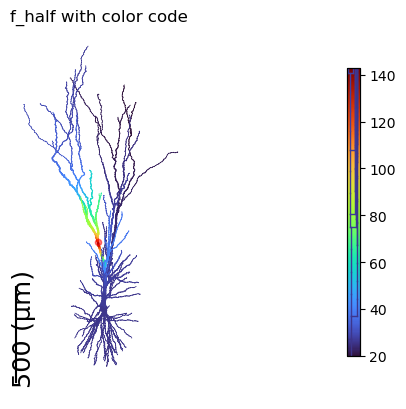

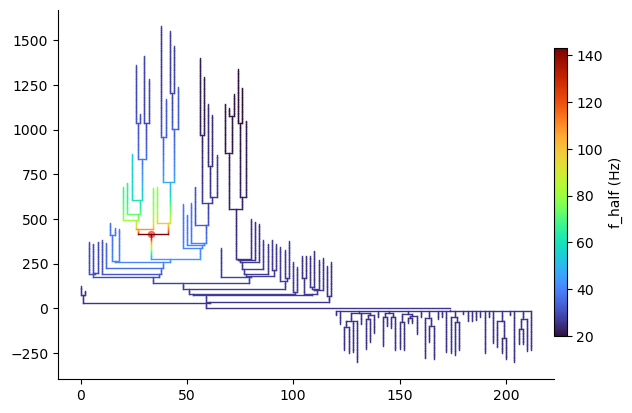

In [12]:
def f_half(seg):
    f, R_tr = transfer_freq(seg, hot_spots[2])
    f_half = f[R_tr<(R_tr.max()-R_tr.min())/2][0]
    return f_half

seg_to_indicate_dict={hot_spots[2]:dict(color='r', alpha=0.5, size=20)}
plt.title('f_half with color code')
ax, color_bar, colors=analyser.plot_morph_with_value_func(func = f_half, run_time=1000, theta=-75, scale=500, 
                                                          diam_factor=0.5, seg_to_indicate_dict=seg_to_indicate_dict)
color_bar.set_ylabel('f_half (Hz)')
analyser.plot_dendogram_with_value_func(func = None, diam_factor=None, colors=colors)

plt.figure()
ax, x_pos, cax, colors = analyser.plot_dendogram_with_value_func(func = None, diam_factor=None, colors=colors, 
                                                                 segs_to_indecate=seg_to_indicate_dict)
cax.set_ylabel('f_half (Hz)')


## creating a movie of voltage response to a somatic stimulated spikes

#### using the video we can also plot the responce of up to 2 position in a saparated graphs, here we show the why its resulted with 0/1/2 such positions

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 26708.03it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


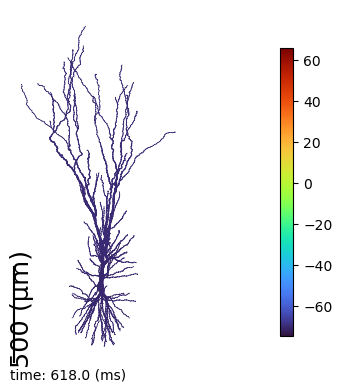

In [8]:
record_dict, _ = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=50,
                                           func_for_missing_frames=np.max, theta=-75, diam_factor=0.5)
animation.ipython_display(fps=10, loop=True, autoplay=True)

## creating a movie of voltage with one voltage indicate

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 10920.54it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


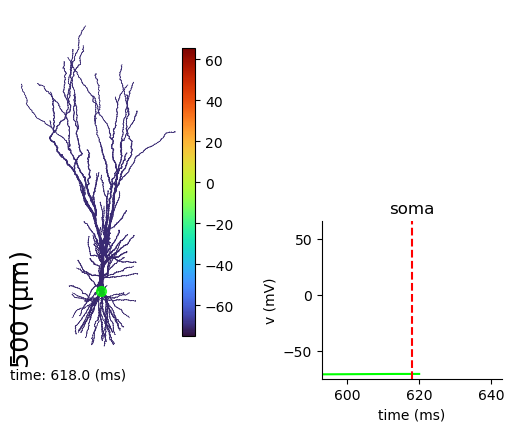

In [9]:
show_records_from = dict()
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)

record_dict, _ = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-75, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)

## creating a movie of voltage with two voltage indicates

optimizing lines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 28783.99it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


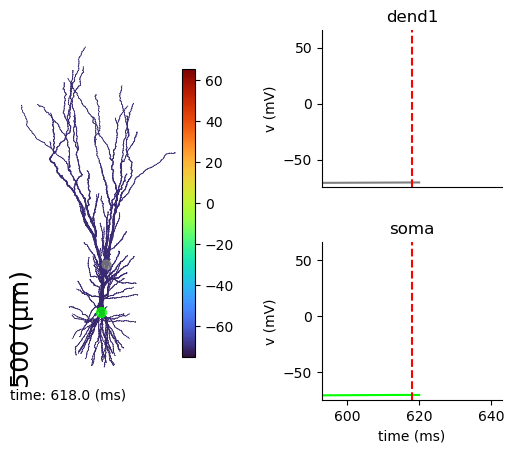

In [5]:
show_records_from = dict()
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from[list(analyser.cell.apic[40])[0]] = dict(label='dend1', alpha=0.75, color='grey', size=40)

record_dict, _ = analyser.record_protocol(cut_start_ms=1000.0, record_name='v')
animation = analyser.create_movie_from_rec(records=record_dict, slow_down_factor=50, 
                                           func_for_missing_frames=np.max, theta=-75, diam_factor=0.5, 
                                           show_records_from=show_records_from)
animation.ipython_display(fps=10, loop=True, autoplay=True)